## Selecting the best movies

In [1]:
import pandas as pd
data = pd.read_csv('imdb.csv')
data.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


creating a variable that stores the movies with the best ratings.

In [2]:
data_best_movie = data[data.Metascore >= 90.0]
data_best_movie = data[data.Rating_from_10 >= 9.0]
data_best_movie.head(7)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0
5,6,The Godfather Part II,1974,R,202,"Crime, Drama",90.0,57.30,9.0
6,7,12 Angry Men,1957,Approved,96,"Crime, Drama",96.0,4.36,9.0


Changing column name Gross_in_S_M to Gross_in_D_M 

note: the column has a $ because python understands it as a command

In [3]:
data_best_movie = data_best_movie.rename({'Gross_in_$_M':'Gross_in_D_M'}, axis = 1)
data_best_movie.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_D_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


Showing the chart of the best high-grossing movies

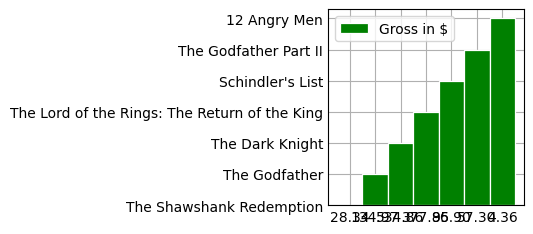

In [4]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

x = data_best_movie.Gross_in_D_M
y = data_best_movie.Movie_name

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor='white', color='green', label='Gross in $' , linewidth=0.9)
ax.legend()

plt.show()

## Creating a machine learning model

Changing the column name 'Gross_in_$_M' to 'Gross_in_D_M' and then deleting that column.

In [5]:
data = data.rename({'Gross_in_$_M':'Gross_in_D_M'}, axis = 1)
data.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_D_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


eliminating useless columns.

In [6]:
data = data.drop('Movie_name',axis=1)
data = data.drop('Year',axis=1)
data = data.drop('Certificate',axis=1)
data = data.drop('Runtime_in_min',axis=1)
data = data.drop('Genre',axis=1)
data = data.drop('Gross_in_D_M', axis=1)
data.head()

,Rank,Metascore,Rating_from_10
0,1,81.0,9.3
1,2,100.0,9.2
2,3,84.0,9.0
3,4,94.0,9.0
4,5,94.0,9.0


The Rank column is in object(String) because at the end of the column it has a value '1000', I took the position data.Rank[999] and transformed it into a float at the correct value 1000.0 and then I converted the Rank column from object to float.

In [7]:
data.Rank[999] = 1000.0
data['Rank'] = data['Rank'].astype(str).astype(float)
data.head()

/tmp/ipykernel_4865/3952591251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Rank[999] = 1000.0


,Rank,Metascore,Rating_from_10
0,1.0,81.0,9.3
1,2.0,100.0,9.2
2,3.0,84.0,9.0
3,4.0,94.0,9.0
4,5.0,94.0,9.0


Showing model information.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   float64
 1   Metascore       840 non-null    float64
 2   Rating_from_10  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


Eliminating all null values.

In [9]:
data = data.dropna()
data.isnull().sum()

Rank              0
Metascore         0
Rating_from_10    0
dtype: int64

Creating an output column.

In [11]:
data.loc[(data.Rating_from_10 >= 9.0),'best_movie'] = 1
data.head(10)

,Rank,Metascore,Rating_from_10,best_movie
0,1.0,81.0,9.3,1.0
1,2.0,100.0,9.2,1.0
2,3.0,84.0,9.0,1.0
3,4.0,94.0,9.0,1.0
4,5.0,94.0,9.0,1.0
5,6.0,90.0,9.0,1.0
6,7.0,96.0,9.0,1.0
8,9.0,94.0,8.9,NaN
11,12.0,74.0,8.8,NaN
12,13.0,87.0,8.8,NaN


In [12]:
data.loc[(data.Rating_from_10 < 9.0),'best_movie'] = 0
data.head(10)

,Rank,Metascore,Rating_from_10,best_movie
0,1.0,81.0,9.3,1.0
1,2.0,100.0,9.2,1.0
2,3.0,84.0,9.0,1.0
3,4.0,94.0,9.0,1.0
4,5.0,94.0,9.0,1.0
5,6.0,90.0,9.0,1.0
6,7.0,96.0,9.0,1.0
8,9.0,94.0,8.9,0.0
11,12.0,74.0,8.8,0.0
12,13.0,87.0,8.8,0.0


## Training and testing the created model.

In [13]:
test = pd.read_csv('imdb.csv')
test = data
test.head()

,Rank,Metascore,Rating_from_10,best_movie
0,1.0,81.0,9.3,1.0
1,2.0,100.0,9.2,1.0
2,3.0,84.0,9.0,1.0
3,4.0,94.0,9.0,1.0
4,5.0,94.0,9.0,1.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [15]:
X_train = data.drop('best_movie',axis=1)
y_train = data.best_movie

In [16]:
X_test = data.drop('best_movie',axis=1)
y_test = data.best_movie

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neight = neigh.fit(X_train, y_train)
clfArvore = tree.DecisionTreeClassifier(random_state=0)
clfArvore = clfArvore.fit(X_train, y_train)
clfLog = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
clfLog = clfLog.fit(X_train, y_train)

In [18]:
pred_KNN = neigh.predict(X_test)
pred_Arvore = clfArvore.predict(X_test)
pred_Log = clfLog.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_KNN)) # KNeighbors Classifier
print(accuracy_score(y_test,pred_Arvore)) # Decision Tree
print(accuracy_score(y_test,pred_Log)) # Linear Regression

0.9988095238095238
1.0
1.0
